In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from umap import UMAP
import numba
from collections import Counter
from gudhi.clustering.tomato import Tomato
from fix_umap_bug import fix_umap_bug
import plotly.graph_objects as go

fix_umap_bug()

In [150]:
layer = "inception4a"
activity = np.load(f"activations/ILSVRC2015/{layer}.npy")
# activity = pd.DataFrame(data=activity)
neurons = activity.shape[1]

In [151]:
cluster_info = pd.read_pickle(f"data/perera/{layer}.pkl")
print(cluster_info.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 8 to 17
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cluster_id           26 non-null     int32  
 1   cluster_size         26 non-null     int64  
 2   cluster_members      26 non-null     object 
 3   longest_bar          26 non-null     float64
 4   Top 10 longest bars  26 non-null     object 
 5   circle_param         26 non-null     object 
 6   info_per_node        26 non-null     object 
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 1.5+ KB
None


In [152]:
cluster_num = 3
cluster = activity[cluster_info["cluster_members"][cluster_num]]
print(cluster.shape)

(3170, 512)


<AxesSubplot:>

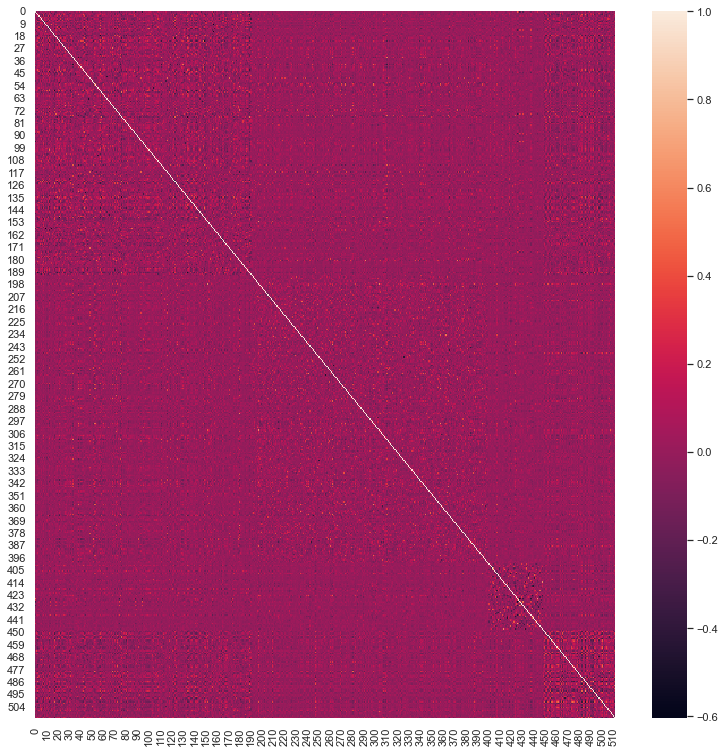

In [153]:
corr = pd.DataFrame(data=activity).corr()
# corr = corr.sort_values(by=50)
sns.set(rc={"figure.figsize": (13, 13)})
sns.heatmap(corr)

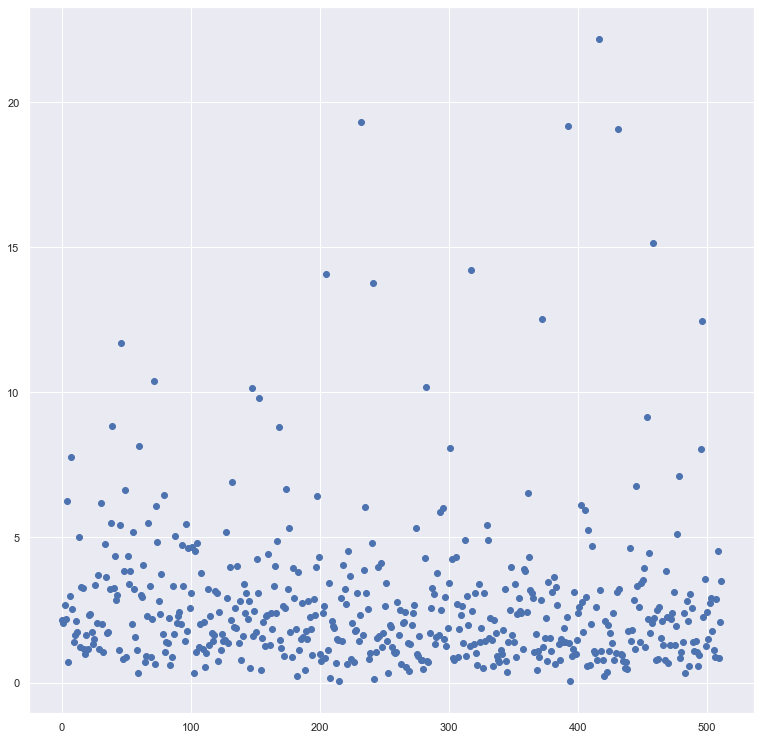

In [38]:
inform_rates = cluster_info["info_per_node"][cluster_num]
plt.scatter(range(neurons), inform_rates)
plt.show()

[  4   7  13  30  38  39  45  46  49  55  60  67  71  73  79  88  96 127
 132 147 153 168 174 176 198 205 232 235 241 274 282 293 295 301 317 329
 361 372 392 402 405 408 416 431 445 453 458 477 478 495 496]
51


<AxesSubplot:>

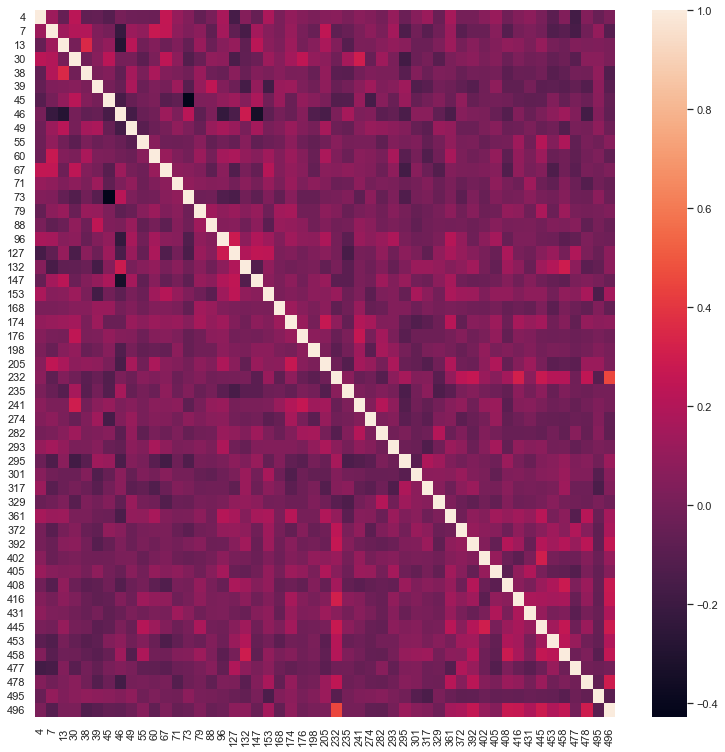

In [143]:
inform = 5
high_inform = np.where(np.array(inform_rates) > inform)[0]
print(high_inform)
print(len(high_inform))
sub_sample = corr.loc[high_inform, high_inform]
sns.heatmap(sub_sample)

<AxesSubplot:>

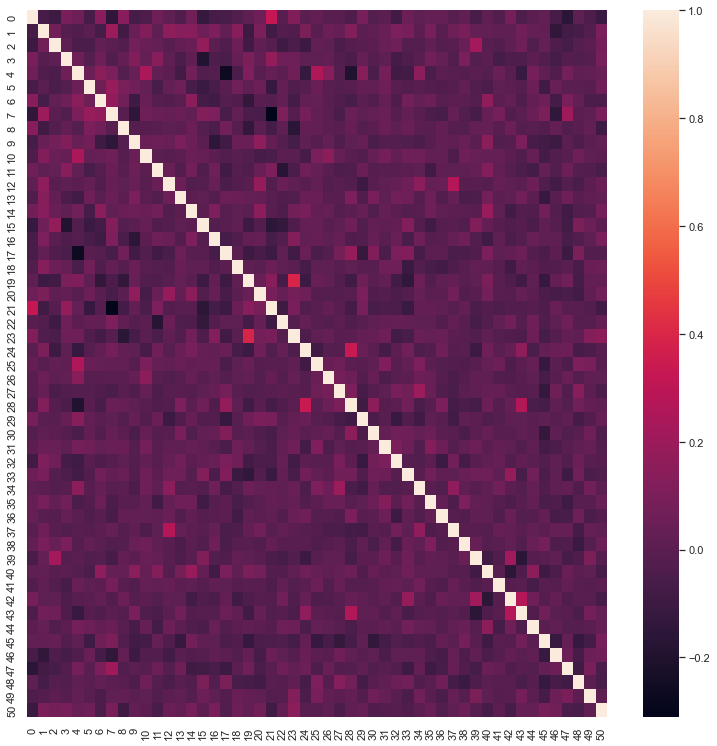

In [154]:
sns.heatmap(pd.DataFrame(data=cluster[:, high_inform]).corr())

In [144]:
high_inform_mask = np.zeros((neurons,), dtype=int)
np.put(high_inform_mask, high_inform, 1)
print(high_inform_mask)

[0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

<AxesSubplot:>

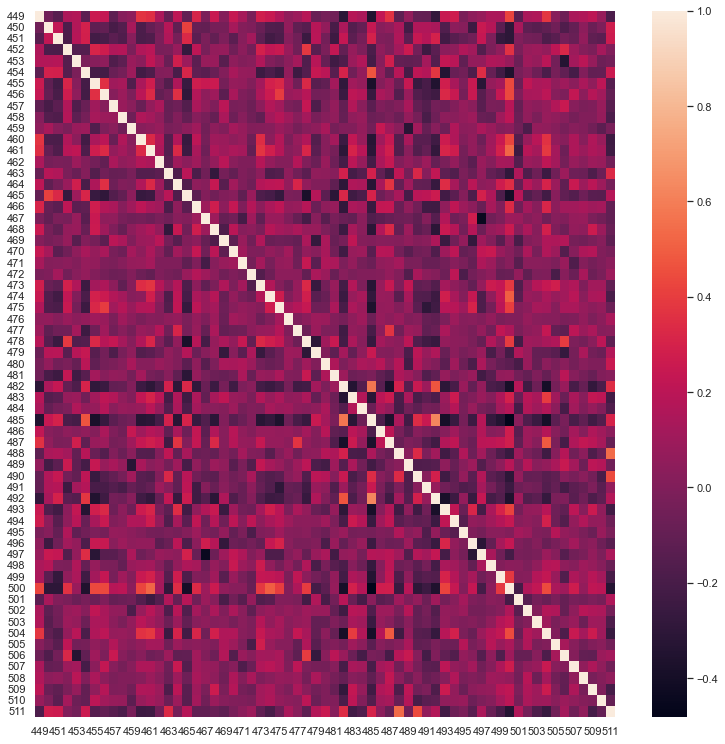

In [156]:
# start, stop = 0, 190
start, stop = 449, 513
# start, stop = 400, 450
sub_sample = corr.loc[start:stop, start:stop]
sns.heatmap(sub_sample)

In [45]:
layout = UMAP(
    n_components=2, verbose=True, n_neighbors=5, min_dist=0.01, metric="correlation"
).fit_transform(activity.T)

UMAP(angular_rp_forest=True, metric='correlation', min_dist=0.01, n_neighbors=5, verbose=True)
Thu Mar 10 16:59:44 2022 Construct fuzzy simplicial set
Thu Mar 10 16:59:57 2022 Finding Nearest Neighbors
Thu Mar 10 16:59:57 2022 Finished Nearest Neighbor Search
Thu Mar 10 16:59:58 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Mar 10 16:59:59 2022 Finished embedding


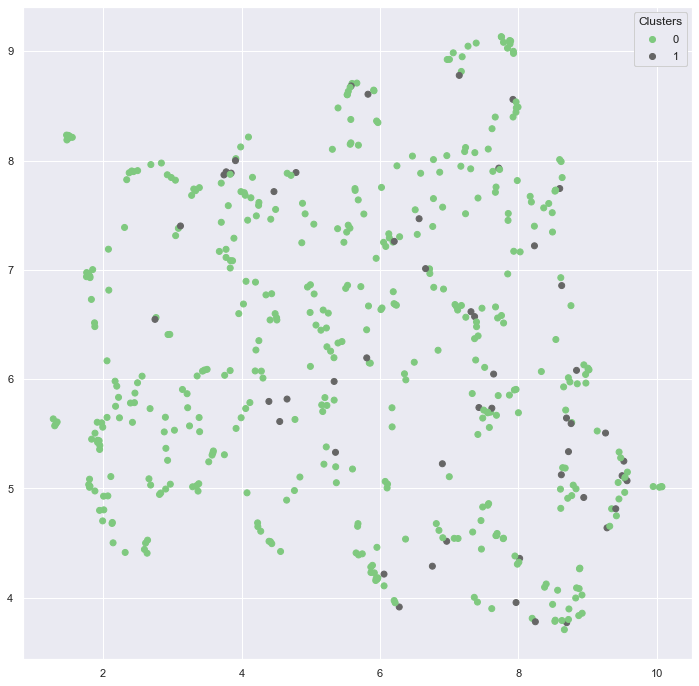

In [60]:
fig, ax = plt.subplots(figsize=(12, 12))
scatter = ax.scatter(
    x=layout[:, 0], y=layout[:, 1], c=high_inform_mask, cmap="Accent"
)  # t.labels_)
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

In [157]:
# activity_data = cluster.T
activity_data = activity.T
layout_3d = UMAP(
    n_components=3,
    verbose=True,
    n_neighbors=5,
    min_dist=0.01,
    metric="correlation"
    # cosine, correlation, euclidean, hamming
).fit_transform(activity_data[450:])

UMAP(angular_rp_forest=True, metric='correlation', min_dist=0.01, n_components=3, n_neighbors=5, verbose=True)
Fri Mar 11 11:28:13 2022 Construct fuzzy simplicial set
Fri Mar 11 11:28:13 2022 Finding Nearest Neighbors
Fri Mar 11 11:28:13 2022 Finished Nearest Neighbor Search
Fri Mar 11 11:28:13 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Fri Mar 11 11:28:14 2022 Finished embedding


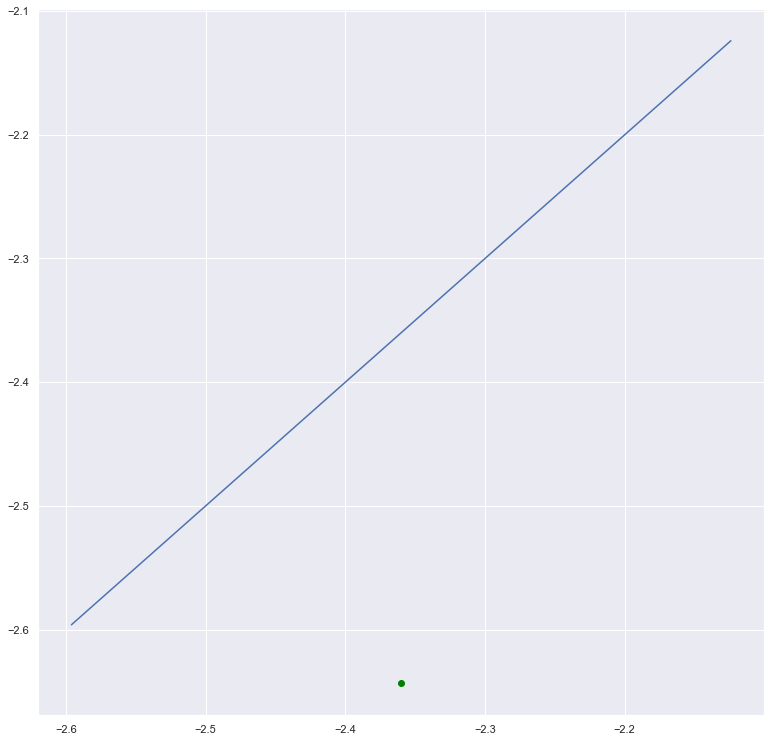

In [158]:
t = Tomato(density_type="logDTM", k=50)  # logDTM
clusters = t.fit_predict(layout_3d)
t.plot_diagram()

In [159]:
print(t.n_clusters_)
# t.n_clusters_ = 3
print(Counter(t.labels_).most_common(10))

1
[(0, 62)]


In [160]:
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=layout_3d[:, 0],
            y=layout_3d[:, 1],
            z=layout_3d[:, 2],
            mode="markers",
            marker=dict(
                size=12,
                color=t.labels_,
                colorscale="aggrnyl",
                opacity=0.8,
                # showscale=True,
            ),
            showlegend=True,
        ),
        go.Scatter3d(
            x=layout_3d[high_inform][:, 0],
            y=layout_3d[high_inform][:, 1],
            z=layout_3d[high_inform][:, 2],
            mode="markers",
            marker=dict(
                size=20,
                color="red",  # t.labels_[high_inform],
                # colorscale="aggrnyl",
                # opacity=0.98,
                # showscale=True,
                symbol="cross",
            ),
        ),
    ]
)
fig.update_layout(
    autosize=False,
    width=1000,
    height=700,
    margin=dict(l=0, r=0, b=0, t=0),
    showlegend=True,
)
fig.write_html(f"neorons_correlation_{layer}_1.html")
fig.show()

IndexError: index 67 is out of bounds for axis 0 with size 62

In [88]:
print(layout_3d[high_inform])  # np.where(high_inform_mask ==1)

[[10.457198    0.75409967  8.888627  ]
 [ 8.884263    0.26428217  6.357796  ]
 [11.83984     0.44672787  7.1264553 ]
 [11.125772    1.7383504   5.8888426 ]
 [ 9.30852     0.22801602  8.793497  ]
 [ 9.583188    0.643501    5.635447  ]
 [ 9.484451    0.7354119   5.370435  ]
 [ 9.2409935  -0.08399239  8.634205  ]
 [ 9.3382435   0.39027858  8.725803  ]
 [ 9.702573    0.23743752  8.269238  ]
 [ 7.422392    0.30418566  8.510088  ]
 [ 8.692751    0.18040708  6.501412  ]
 [10.474541    0.5864061   8.872803  ]
 [ 9.601076    0.27179798  8.766392  ]]
